In [ ]:
# install the dependencies
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [ ]:
#load the data
from google.colab import files
uploaded = files.upload()

Saving WIKI-PRICES.csv to WIKI-PRICES.csv


In [ ]:
#store the data into a df
wiki_df = pd.read_csv('WIKI-PRICES.csv')
wiki_df.head(10)

,ticker,date,open,high,low,close,volume,ex-dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume
0,ZUMZ,2018-03-27,24.65,24.65,23.3500,23.60,403884.0,0.0,1.0,24.65,24.65,23.3500,23.60,403884.0
1,ZUMZ,2018-03-26,23.75,24.80,23.7000,24.65,375320.0,0.0,1.0,23.75,24.80,23.7000,24.65,375320.0
2,ZUMZ,2018-03-23,23.55,24.20,23.4500,23.55,301584.0,0.0,1.0,23.55,24.20,23.4500,23.55,301584.0
3,ZUMZ,2018-03-22,23.90,24.35,23.3000,23.35,269607.0,0.0,1.0,23.90,24.35,23.3000,23.35,269607.0
4,ZUMZ,2018-03-21,23.80,24.60,23.6058,23.95,354092.0,0.0,1.0,23.80,24.60,23.6058,23.95,354092.0
5,ZUMZ,2018-03-20,23.10,24.00,22.9500,23.80,404873.0,0.0,1.0,23.10,24.00,22.9500,23.80,404873.0
6,ZUMZ,2018-03-19,22.15,23.65,22.1500,23.40,858257.0,0.0,1.0,22.15,23.65,22.1500,23.40,858257.0
7,ZUMZ,2018-03-16,20.40,23.00,19.3000,22.10,2059778.0,0.0,1.0,20.40,23.00,19.3000,22.10,2059778.0
8,ZUMZ,2018-03-15,19.75,20.15,19.4000,20.00,599736.0,0.0,1.0,19.75,20.15,19.4000,20.00,599736.0
9,ZUMZ,2018-03-14,20.10,20.20,19.1500,19.60,357345.0,0.0,1.0,20.10,20.20,19.1500,19.60,357345.0


In [ ]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = wiki_df["close"].values.reshape(-1, 1)
y = wiki_df["volume"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (10000, 1) (10000, 1)


Text(0, 0.5, 'Volume')

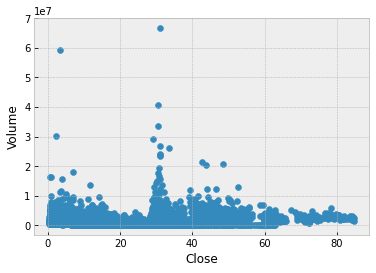

In [ ]:
# Plot the data to see if a linear trend exists

plt.scatter(X, y)
plt.xlabel("Close")
plt.ylabel("Volume")


In [ ]:
# Use sklearn's `train_test_split` to split the data into training and testing

from sklearn.model_selection import train_test_split



X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [ ]:
# Create the model


from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [ ]:
# Fit the model to the training data. 


model.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Calculate the mean_squared_error and the r-squared value
# for the testing data

from sklearn.metrics import mean_squared_error, r2_score



# Use our model to make predictions
predicted = model.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 4953504332412.21
R-squared (R2 ): 0.010054549806166158


In [ ]:
#Ideal MSE = 0 and Ideal R2 = 1

In [ ]:
#High MSE and Low R2 means there is not much correlation between "Close" and "Volume", and predictions not great

In [ ]:
#RESIDUAL PLOT
X = wiki_df["close"].values.reshape(-1, 1)
y = wiki_df["volume"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (10000, 1) (10000, 1)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
#Scale and normalize the data using StandardScaler
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

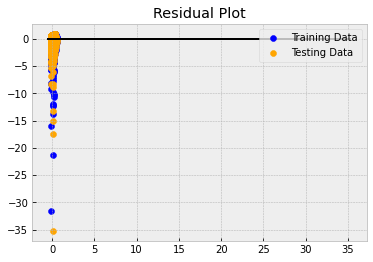

In [ ]:
#Fit the model to the scaled training data and make predictions using scaled test data
# Plot the results 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [ ]:
#Quantify the model
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 1.4414295985997965, R2: 0.010054549806165936


In [ ]:
#MSE is higher than 1 and R2 is close to zero - so even with scaling the data, there is not a readily apparent connection between "price" and "volume".

In [ ]:
#load the data
from google.colab import files
uploaded = files.upload()

Saving WIKI-PRICES_v2.csv to WIKI-PRICES_v2.csv


In [ ]:
#store the data into a df
wiki2_df = pd.read_csv('WIKI-PRICES_v2.csv')
wiki2_df.head(10)

,ticker,date,open,high,low,close,volume,ex-dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume,percent_price_change
0,ZUMZ,3/27/18,24.65,24.65,23.3500,23.60,403884,0.0,1.0,24.65,24.65,23.3500,23.60,403884,-4.26
1,ZUMZ,3/26/18,23.75,24.80,23.7000,24.65,375320,0.0,1.0,23.75,24.80,23.7000,24.65,375320,3.79
2,ZUMZ,3/23/18,23.55,24.20,23.4500,23.55,301584,0.0,1.0,23.55,24.20,23.4500,23.55,301584,0.00
3,ZUMZ,3/22/18,23.90,24.35,23.3000,23.35,269607,0.0,1.0,23.90,24.35,23.3000,23.35,269607,-2.30
4,ZUMZ,3/21/18,23.80,24.60,23.6058,23.95,354092,0.0,1.0,23.80,24.60,23.6058,23.95,354092,0.63
5,ZUMZ,3/20/18,23.10,24.00,22.9500,23.80,404873,0.0,1.0,23.10,24.00,22.9500,23.80,404873,3.03
6,ZUMZ,3/19/18,22.15,23.65,22.1500,23.40,858257,0.0,1.0,22.15,23.65,22.1500,23.40,858257,5.64
7,ZUMZ,3/16/18,20.40,23.00,19.3000,22.10,2059778,0.0,1.0,20.40,23.00,19.3000,22.10,2059778,8.33
8,ZUMZ,3/15/18,19.75,20.15,19.4000,20.00,599736,0.0,1.0,19.75,20.15,19.4000,20.00,599736,1.27
9,ZUMZ,3/14/18,20.10,20.20,19.1500,19.60,357345,0.0,1.0,20.10,20.20,19.1500,19.60,357345,-2.49


In [ ]:
wiki2b_df = wiki2_df[["date", "open", "close", "percent_price_change", "volume"]]
wiki2b_df.head(10)

,date,open,close,percent_price_change,volume
0,3/27/18,24.65,23.60,-4.26,403884
1,3/26/18,23.75,24.65,3.79,375320
2,3/23/18,23.55,23.55,0.00,301584
3,3/22/18,23.90,23.35,-2.30,269607
4,3/21/18,23.80,23.95,0.63,354092
5,3/20/18,23.10,23.80,3.03,404873
6,3/19/18,22.15,23.40,5.64,858257
7,3/16/18,20.40,22.10,8.33,2059778
8,3/15/18,19.75,20.00,1.27,599736
9,3/14/18,20.10,19.60,-2.49,357345


In [ ]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = wiki2b_df["volume"].values.reshape(-1, 1)
y = wiki2b_df["percent_price_change"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (10000, 1) (10000, 1)


Text(0, 0.5, 'Percent Price Change')

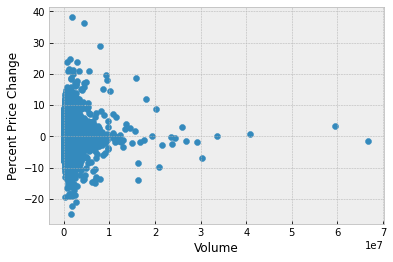

In [ ]:
# Plot the data to see if a linear trend exists

plt.scatter(X, y)
plt.xlabel("Volume")
plt.ylabel("Percent Price Change")

In [ ]:
#INITIAL LINEAR REGRESSION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
# Create the model


from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [ ]:
# Fit the model to the training data. 


model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Calculate the mean_squared_error and the r-squared value
# for the testing data

from sklearn.metrics import mean_squared_error, r2_score



# Use our model to make predictions
predicted = model.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 10.94383186315623
R-squared (R2 ): 6.649158809590716e-05


In [ ]:
#Ideal MSE = 0 and Ideal R2 = 1

In [ ]:
#MSE trends away from 0 and R2 far away from 1, so there is not much correlation between "Volume" and "Percent Price Change", and predictions not great

In [ ]:
#RESIDUAL PLOT
#Scale and normalize the data using StandardScaler
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

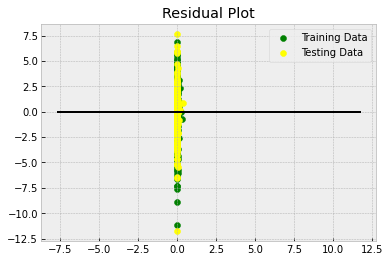

In [ ]:
#Fit the model to the scaled training data and make predictions using scaled test data
# Plot the results 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="green", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="yellow", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [ ]:
#Quantify the model
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 1.0387610185392453, R2: 6.649158809590716e-05


In [ ]:
#MSE is trending to 1 and R2 very far from 1 - so even with scaling the data, there is not a readily apparent connection between "volume"and "percent price change".